In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define random state

In [2]:
rs = np.random.RandomState(seed=7)

# Generate random nth order polynomial

In [30]:
def gen_poly(order, rng):
    
    coefs = rng.randn(order)
    
    def my_poly(x):
        
        return np.sum([c * x ** k for c, k in zip(coefs, np.arange(order))], axis=0)
    
    return my_poly

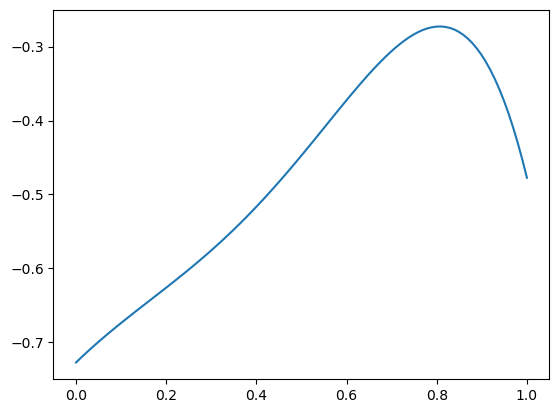

In [31]:
order = 8

my_poly = gen_poly(order, rs)

x = np.linspace(0, 1, 100)
y = my_poly(x)

plt.plot(x, y)
plt.show()

# Train NN to learn poly *without* temporal embedding

- how much data do we need?
- how big does our hidden layer need to be?

In [32]:
from sklearn.neural_network import MLPRegressor

In [33]:
hidden_layer_sizes = (100,)

x_train = rs.rand(1000)
y_train = my_poly(x_train)

mdl = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, early_stopping=True).fit(x_train[:, None], y_train)

x_test = np.linspace(0, 1, 200)
y_test = mdl.predict(x_test[:, None])

/Users/mme4/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


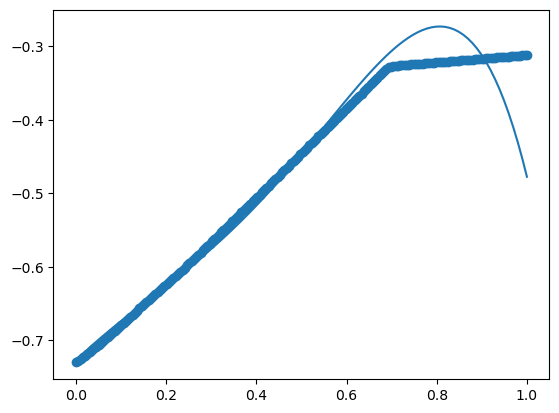

In [34]:
plt.plot(x, y)
plt.scatter(x_test, y_test)
plt.show()

# Train NN to learn poly *with* temporal embedding

- how much data do we need?
- how big does our hidden layer need to be?

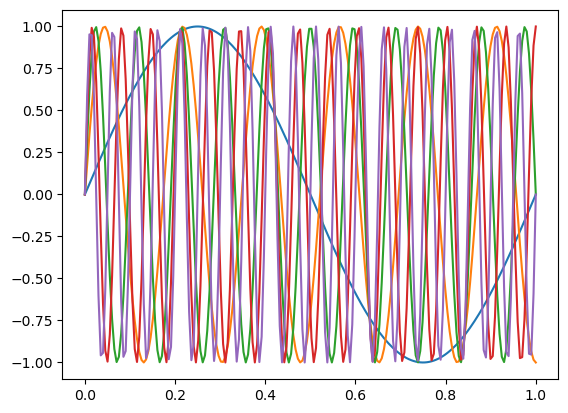

In [35]:
for freq in np.linspace(1, 20, 5):
    plt.plot(x_test, np.sin(freq * 2 * np.pi * x_test))
plt.show()

In [36]:
def gen_temporal_embedding(t):
    
    dims = []
    
    dims.append(t)
    
    for freq in np.linspace(1, 20, 5):
        dims.append(np.sin(freq * 2 * np.pi * t))
        dims.append(np.cos(freq * 2 * np.pi * t))
        
    return np.stack(dims).T

In [37]:
hidden_layer_sizes = (100,)

x_train = rs.rand(1000)
x_train_emb = gen_temporal_embedding(x_train)
y_train = my_poly(x_train)

mdl = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, early_stopping=True).fit(x_train_emb, y_train)

x_test = np.linspace(0, 1, 200)
x_test_emb = gen_temporal_embedding(x_test)
y_test = mdl.predict(x_test_emb)

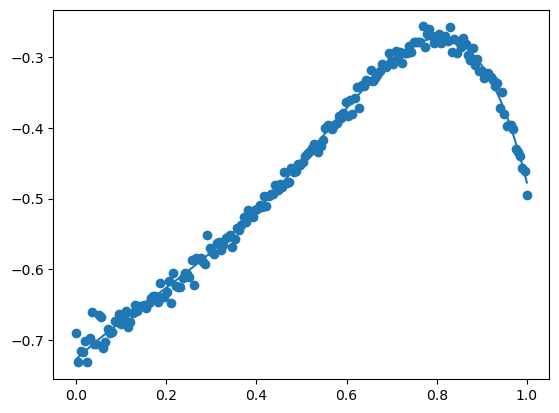

In [38]:
plt.plot(x, y)
plt.scatter(x_test, y_test)
plt.show()